#Data Source and Contents

## Import libraries

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier 
import xgboost as xgb 
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/ArinB/MSBA-CA-03-Decision-Trees/master/census_data.csv')
data.count()
data.shape
data.head()

,hours_per_week_bin,occupation_bin,msr_bin,capital_gl_bin,race_sex_bin,education_num_bin,education_bin,workclass_bin,age_bin,flag,y
0,b. 31-40,b. Mid - Low,b. Mid,c. > 0,c. High,c. 13,c. Bachelors,b. income,d. 36-40 & 56-60,train,0
1,a. 0-30,e. High,c. High,a. = 0,c. High,c. 13,c. Bachelors,b. income,e. 40-55,train,0
2,b. 31-40,a. Low,b. Mid,a. = 0,c. High,b. 9-12,b. Mid,b. income,d. 36-40 & 56-60,train,0
3,b. 31-40,a. Low,c. High,a. = 0,b. Mid,a. 0-8,a. Low,b. income,e. 40-55,train,0
4,b. 31-40,e. High,c. High,a. = 0,a. Low,c. 13,c. Bachelors,b. income,b. 26-30 & 71-100,train,0


## Data Cleaning 
Remove a,b,c,d for each column

In [3]:
data['capital_gl_bin'] = data['capital_gl_bin'].str.split('.', expand=True)[1]
print(data['capital_gl_bin'])
for column in data.drop(columns = ['flag','y','capital_gl_bin']):
  data[column] = data[column].str.split('. ', expand=True)[1]

0         > 0
1         = 0
2         = 0
3         = 0
4         = 0
         ... 
48837     = 0
48838     = 0
48839     = 0
48840     > 0
48841     = 0
Name: capital_gl_bin, Length: 48842, dtype: object


In [4]:
#Display cleaned dataset
data.head()

,hours_per_week_bin,occupation_bin,msr_bin,capital_gl_bin,race_sex_bin,education_num_bin,education_bin,workclass_bin,age_bin,flag,y
0,31-40,Mi,Mid,> 0,High,13,Bachelors,income,36-4,train,0
1,0-30,High,High,= 0,High,13,Bachelors,income,40-55,train,0
2,31-40,Low,Mid,= 0,High,9-12,Mid,income,36-4,train,0
3,31-40,Low,High,= 0,Mid,0-8,Low,income,40-55,train,0
4,31-40,High,High,= 0,Low,13,Bachelors,income,26-3,train,0


# Finding Optimal Value of a key Hyper-parameter

In [0]:
#Split the data into train and test and create dummies for catogorical variables because DecisionTreeClassifier() doesn't support cateorical variables

train_data = data[data['flag'] == 'train'] 

test_data= data[data['flag']== 'test'] 

cat_feats = ['age_bin', 'capital_gl_bin', 'education_bin', 'hours_per_week_bin', 'msr_bin', 'occupation_bin', 'race_sex_bin']

#create dummies for the the training data
y_train = train_data['y']

x_train = train_data[['age_bin', 'capital_gl_bin', 'education_bin','hours_per_week_bin', 'msr_bin', 'occupation_bin', 'race_sex_bin']]

x_train = pd.get_dummies(x_train, columns=cat_feats, drop_first=True)

#create dummies for the test data 
y_test = test_data['y']

x_test = test_data[['age_bin', 'capital_gl_bin', 'education_bin','hours_per_week_bin', 'msr_bin', 'occupation_bin', 'race_sex_bin']]

x_test = pd.get_dummies(x_test, columns=cat_feats, drop_first=True)

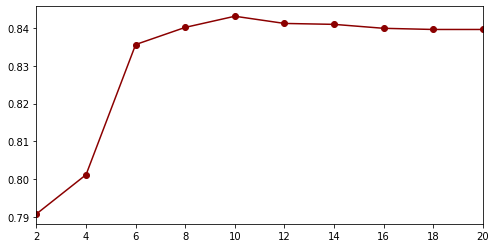

In [6]:
results = []
max_depth_options = [2,4,6,8,10,12,14,16,18,20]
for trees in max_depth_options:
  model = DecisionTreeClassifier(max_depth = trees, random_state = 101)
  model.fit(x_train, y_train)
  y_pred = model.predict(x_test)
  accuracy = np.mean(y_test==y_pred)
  results.append(accuracy)

plt.figure(figsize=(8,4))
pd.Series(results, max_depth_options).plot(color='darkred', marker = 'o')

In [0]:
#The optimal number for the tree depth is 10. The decision tree doesn't improve past 10 levels. 

# Building a Random Forest Model

In [0]:
#pip install -U scikit-learn

## Random Forest

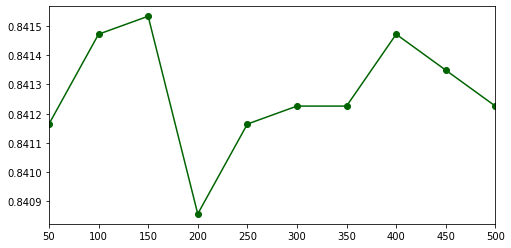

In [7]:
accuracy_scores = []
n_estimator = [50,100,150,200,250,300,350,400,450,500]
for items in n_estimator:
  rf_model = RandomForestClassifier(random_state = 101, n_estimators = items)
  rf_model.fit(x_train, y_train)
  y_pred = rf_model.predict(x_test)
  accuracy = np.mean(y_test==y_pred)
  accuracy_scores.append(accuracy)

plt.figure(figsize=(8,4))
pd.Series(accuracy_scores, n_estimator).plot(color='darkgreen', marker = 'o')

In [0]:
#The optimal accuracy of the tree is when the random forest uses 150 trees
#The accuracy is the lowest when there are 200 trees in the forest

# Building AdaBoost, Gradient Boost (classifier) and XGB Model

## AdaBoost

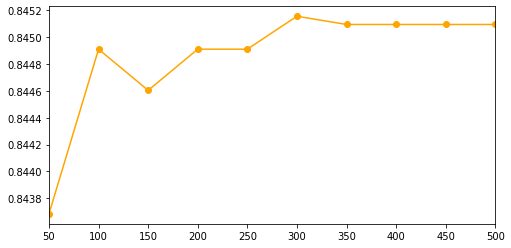

In [8]:
accuracy_scores = []
n_estimator = [50,100,150,200,250,300,350,400,450,500]
for items in n_estimator:
  ab_model = AdaBoostClassifier(random_state =0, n_estimators = items)
  ab_model.fit(x_train, y_train)
  y_pred = ab_model.predict(x_test)
  accuracy = np.mean(y_test==y_pred)
  accuracy_scores.append(accuracy)

plt.figure(figsize=(8,4))
pd.Series(accuracy_scores, n_estimator).plot(color='orange', marker = 'o')

In [0]:
#The AdaBoost model's optimal accuracy is achieved using 300 trees

## Gradient Boost

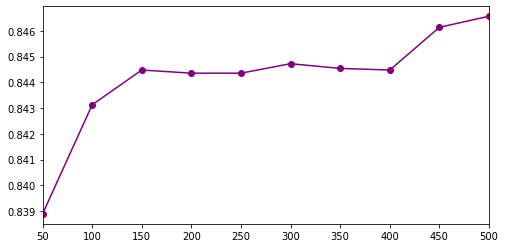

In [9]:
accuracy_scores = []
n_estimator = [50,100,150,200,250,300,350,400,450,500]
for items in n_estimator:
  gb_model = GradientBoostingClassifier(random_state =0, n_estimators = items, learning_rate= 0.1, max_depth = 2)
  gb_model.fit(x_train, y_train)
  y_pred = gb_model.predict(x_test)
  accuracy = np.mean(y_test==y_pred)
  accuracy_scores.append(accuracy)

plt.figure(figsize=(8,4))
pd.Series(accuracy_scores, n_estimator).plot(color='purple', marker = 'o')


In [0]:
#The gradient boost model's optimal accuracy is achieved using 500 trees

In [0]:
#pip install xgboost

## XGB

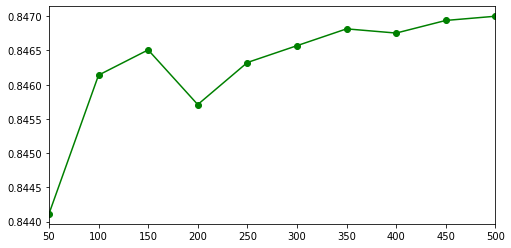

In [10]:
data=data.replace(', ','<',regex=True).astype(str)


accuracy_scores = []
n_estimator = [50,100,150,200,250,300,350,400,450,500]
for items in n_estimator:
  xgb_model = XGBClassifier(n_estimators=items, eta=0.3, objective = 'multi:softprob', num_class=3, max_depth = 3)
  xgb_model.fit(x_train, y_train)
  y_pred = xgb_model.predict(x_test)
  accuracy = np.mean(y_test==y_pred)
  accuracy_scores.append(accuracy)


plt.figure(figsize=(8,4))
pd.Series(accuracy_scores, n_estimator).plot(color='green', marker = 'o')


In [0]:
#The XBG model's optimal accuracy is achieved using 500 trees

# Compare Preformance

Compare preformance of each ensemble model using common hyper-paremeters n_estimators=150 and random_state=101. The random forest model preformed best using n_estimators of 150, so I will use this value in each of the models to compared their preformance in terms of accuracy and auc. 

In [12]:
#Random Forest Model
rf_model = RandomForestClassifier(random_state = 101, n_estimators = 150)
rf_model.fit(x_train, y_train)
y_pred = rf_model.predict(x_test)
rf_accuracy = np.mean(y_test==y_pred)
rf_auc=roc_auc_score(y_test, y_pred)

#AdaBoost Model 
ab_model = AdaBoostClassifier(random_state =101, n_estimators = 150)
ab_model.fit(x_train, y_train)
y_pred = ab_model.predict(x_test)
ab_accuracy = np.mean(y_test==y_pred)
ab_auc=roc_auc_score(y_test, y_pred)


#Gradient Boost 
gb_model = GradientBoostingClassifier(random_state =101, n_estimators = 150)
gb_model.fit(x_train, y_train)
y_pred = gb_model.predict(x_test)
gb_accuracy = np.mean(y_test==y_pred)
gb_auc=roc_auc_score(y_test, y_pred)


#XGB Boost
xgb_model = XGBClassifier(random_state=101, n_estimators=150)
xgb_model.fit(x_train, y_train)
y_pred = xgb_model.predict(x_test)
xgb_accuracy = np.mean(y_test==y_pred)
xgb_auc=roc_auc_score(y_test, y_pred)

df = pd.DataFrame({'Random Forest': [rf_accuracy, rf_auc, 150, 101],
                   'AdaBoost': [ab_accuracy, ab_auc, 150, 101],
                   'Gradient Boost': [gb_accuracy, gb_auc, 150, 101],
                   'XGB': [xgb_accuracy, xgb_auc, 150, 101]},
                  index=['Accuracy', 'AUC', 'n_estimators', 'random_state'])
df = round(df, 3)
df.head()

,Random Forest,AdaBoost,Gradient Boost,XGB
Accuracy,0.842,0.845,0.846,0.847
AUC,0.743,0.743,0.747,0.748
n_estimators,150.000,150.000,150.000,150.000
random_state,101.000,101.000,101.000,101.000


The random forest model reach its optimal preformance using 150 trees, n_estimators=150. However, when using these same hyper-parameters (n_estimators=150 and random_state=101) in each of the other models, the XGB model preformed the best.  Therefore, I would use the XBG model for prediction because it has the highest accuracy and auc values. 